# WeatherPy

In [62]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import the API key
from api_keys import weather_api_key

# citypy to determine cities based latitude and longitude
from citipy import citipy

# output file
output_data_file = "../output_data/cities.csv"

# Range of lat and long
latRange = (-90, 90)
longRange = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lats_longs and cities
lats_longs = []
cities = []

# Create a set of random latitudes and longitudes combination
lats = np.random.uniform(latRange[0], latRange[1], size=1500)
longs = np.random.uniform(longRange[0], longRange[1], size=1500)
lats_longs = zip(lats, longs)

# Get nearest city from the lats_longs combination
for lat_long in lats_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If city is unique, append to our cities list
    if city not in cities:
        cities.append(city)



# Print the count of cities            
len(cities)

611

In [3]:
cities

['doha',
 'mataura',
 'saskylakh',
 'port elizabeth',
 'talara',
 'punta arenas',
 'taolanaro',
 'hobart',
 'szprotawa',
 'bonavista',
 'dikson',
 'kapaa',
 'kruisfontein',
 'bambari',
 'upernavik',
 'mahebourg',
 'bluff',
 'puerto ayora',
 'bredasdorp',
 'ushuaia',
 'grand gaube',
 'darnah',
 'yuncheng',
 'humaita',
 'castro',
 'yellowknife',
 'busselton',
 'vulcan',
 'qaanaaq',
 'amderma',
 'esperance',
 'karkaralinsk',
 'ulladulla',
 'mount gambier',
 'faanui',
 'albany',
 'barrow',
 'nome',
 'lebu',
 'khatanga',
 'port lincoln',
 'hermanus',
 'kodiak',
 'narrabri',
 'marfino',
 'mys shmidta',
 'zheleznodorozhnyy',
 'coihaique',
 'longyearbyen',
 'pevek',
 'rikitea',
 'laguna',
 'attawapiskat',
 'bengkulu',
 'airai',
 'acarau',
 'vaini',
 'tsihombe',
 'butaritari',
 'flin flon',
 'cape town',
 'east london',
 'san cristobal',
 'bloemfontein',
 'narsaq',
 'saint-pierre',
 'qaqortoq',
 'sao joao da barra',
 'lavrentiya',
 'whitianga',
 'lima',
 'pesaro',
 'vila velha',
 'atuona',
 'ja

# Perform API Calls
 - Perform a weather check on each city using a series of successive API calls.
 - Include a print log of each city as it'sbeing processed (with the city number and city name).



In [4]:
print("Beginning Data Retrieval")
print("-------------------------------------")

# Create an empty list to store the responses
response_json = []

# Create empty lists to hold the data for each city
cityList = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# The base url
url = "https://api.openweathermap.org/data/2.5/weather?"
# Counters to use when iterating
limit = 50
Set = 1
rec = -1

for city in cities:
    rec += 1            
    print(f"Processing Record {rec} of Set {Set} | {city}")
    if rec == limit:
        rec = -1
        Set += 1
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
        
    try:
        
        # Get one of the city's weather
        weather_response = requests.get(query_url).json()
        # Load data to the open lists ready for the DataFrame
        cityList.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        
    except KeyError:
        print("City not found. Skipping...")
        
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")        

Beginning Data Retrieval
-------------------------------------
Processing Record 0 of Set 1 | doha
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | talara
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | szprotawa
Processing Record 9 of Set 1 | bonavista
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | bambari
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | grand gaube
Processing Record 21 of Set 1 | darnah
Processin

Processing Record 32 of Set 4 | hithadhoo
Processing Record 33 of Set 4 | pangnirtung
Processing Record 34 of Set 4 | marystown
Processing Record 35 of Set 4 | maldonado
Processing Record 36 of Set 4 | acajutla
Processing Record 37 of Set 4 | kavieng
Processing Record 38 of Set 4 | cayenne
Processing Record 39 of Set 4 | mogadishu
Processing Record 40 of Set 4 | maues
Processing Record 41 of Set 4 | paamiut
Processing Record 42 of Set 4 | rio grande
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | kampot
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | chapais
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | san patricio
Processing Record 0 of Set 5 | grindavik
Processing Record 1 of Set 5 | chokurdakh
Processing Record 2 of Set 5 | bukachacha
Processing Record 3 of Set 5 | elat
Processing Record 4 of Set 5 | kalabo
Processi

Processing Record 17 of Set 8 | nishihara
Processing Record 18 of Set 8 | veraval
Processing Record 19 of Set 8 | teya
Processing Record 20 of Set 8 | poum
Processing Record 21 of Set 8 | adrar
Processing Record 22 of Set 8 | sumter
Processing Record 23 of Set 8 | tabat
Processing Record 24 of Set 8 | herat
Processing Record 25 of Set 8 | yulara
Processing Record 26 of Set 8 | maceio
Processing Record 27 of Set 8 | boyabat
Processing Record 28 of Set 8 | matay
Processing Record 29 of Set 8 | pangai
Processing Record 30 of Set 8 | kimbe
Processing Record 31 of Set 8 | hegang
Processing Record 32 of Set 8 | belyy yar
Processing Record 33 of Set 8 | trairi
Processing Record 34 of Set 8 | igarka
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | hasaki
Processing Record 37 of Set 8 | autazes
Processing Record 38 of Set 8 | nelson bay
Processing Record 39 of Set 8 | sungairaya
Processing Record 40 of Set 8 | norman wells
Processing Record 41 of Set 8 | tarnogskiy gorod

City not found. Skipping...
Processing Record 1 of Set 12 | sitka
Processing Record 2 of Set 12 | te anau
Processing Record 3 of Set 12 | osoyoos
Processing Record 4 of Set 12 | moroni
Processing Record 5 of Set 12 | culebra
Processing Record 6 of Set 12 | cabedelo
Processing Record 7 of Set 12 | hohhot
Processing Record 8 of Set 12 | asau
Processing Record 9 of Set 12 | acapulco
Processing Record 10 of Set 12 | bodaybo
Processing Record 11 of Set 12 | sao felix do xingu
Processing Record 12 of Set 12 | balykshi
Processing Record 13 of Set 12 | seminole
Processing Record 14 of Set 12 | kununurra
Processing Record 15 of Set 12 | talcahuano
Processing Record 16 of Set 12 | cervo
Processing Record 17 of Set 12 | naze
Processing Record 18 of Set 12 | ahuimanu
Processing Record 19 of Set 12 | cockburn town
Processing Record 20 of Set 12 | costinesti
Processing Record 21 of Set 12 | avera
Processing Record 22 of Set 12 | dharchula
Processing Record 23 of Set 12 | sibolga
Processing Record 24

In [63]:
# Create the dataframe to hold city info
cities_df = pd.DataFrame({
                        "City":cityList,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Humidity":humidity,
                        "Cloudiness":cloudiness,
                        "Wind Speed":wind_speed,
                        "Country":country,
                        "Date":date
                        })
cities_df.to_csv(output_data_file)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Doha,25.2867,51.5333,73.40,43,0,9.22,QA,1610196904
1,Mataura,-46.1927,168.8643,54.00,84,56,5.01,NZ,1610196904
2,Saskylakh,71.9167,114.0833,-19.98,86,100,12.21,RU,1610196905
3,Port Elizabeth,-33.9180,25.5701,84.20,61,20,12.66,ZA,1610196821
4,Talara,-4.5772,-81.2719,69.80,88,75,14.97,PE,1610196681


In [24]:
# Remove the cities where the humidity > 100%.
cities_humidity_df = cities_df.loc[cities_df['Humidity'] <= 100]
cities_humidity_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Doha,25.2867,51.5333,73.40,43,0,9.22,QA,1610196904
1,Mataura,-46.1927,168.8643,54.00,84,56,5.01,NZ,1610196904
2,Saskylakh,71.9167,114.0833,-19.98,86,100,12.21,RU,1610196905
3,Port Elizabeth,-33.9180,25.5701,84.20,61,20,12.66,ZA,1610196821
4,Talara,-4.5772,-81.2719,69.80,88,75,14.97,PE,1610196681


In [7]:
# Show statistics of the new dataframe
cities_humidity_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,18.475127,16.589569,51.354651,71.581395,56.048301,7.826637,1.610197e+09
std,33.778287,88.953991,32.750617,20.287541,40.278593,5.707506,1.022700e+02
min,-54.800000,-179.166700,-33.180000,9.000000,0.000000,0.090000,1.610197e+09
25%,-8.467800,-60.686650,26.600000,61.000000,8.500000,3.440000,1.610197e+09
50%,21.426700,22.636700,62.010000,77.000000,75.000000,6.110000,1.610197e+09
75%,46.713450,92.688350,78.845000,86.500000,95.500000,10.360000,1.610197e+09
max,78.218600,178.416700,106.860000,100.000000,100.000000,36.820000,1.610197e+09


## Plotting the Data

- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.



#### Temperature (F) vs. Latitude

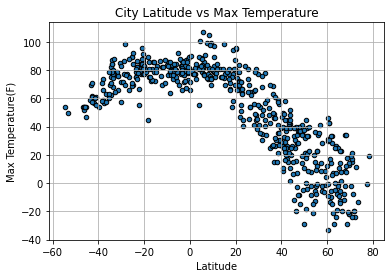

In [64]:
# Create scatter plot, save .png and show the figure
cities_humidity_df.plot.scatter(x='Lat', y='Max Temp', grid=True, edgecolors="black", 
                                title="City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("../output_data/Temp_vs_Lat.png")
plt.show()

- This plot shows that the there is a corelation between temperature and latitude. The temperature increases with increase in latitude. The further you move away from the equater, the temperature continues to drop

#### Humidity (%) vs. Latitude

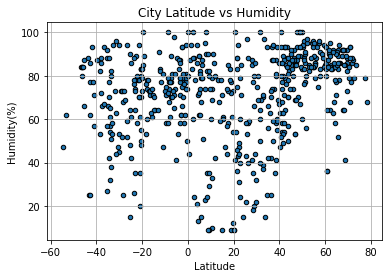

In [65]:
# Create scatter plot, save .png and show the figure
cities_humidity_df.plot.scatter(x='Lat', y='Humidity', grid=True, edgecolors="black", title="City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../output_data/Hum_vs_Lat.png")
plt.show()

- There is no significant corelation between humidity and latitude.

#### Cloudiness (%) vs. Latitude

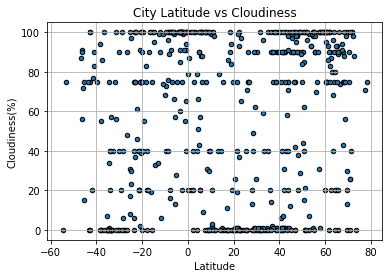

In [66]:
# Create scatter plot, save .png and show the figure
cities_humidity_df.plot.scatter(x='Lat', y='Cloudiness', grid=True, edgecolors="black", title="City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("../output_data/Cloud_vs_Lat.png")
plt.show()

- This chart shows there is very little corelation between cloudiness and a city's latitude

#### Wind Speed (mph) vs. Latitude

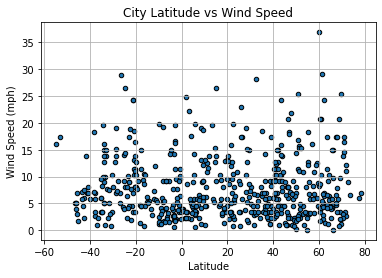

In [67]:
# Create scatter plot, save .png and show the figure
cities_humidity_df.plot.scatter(x='Lat', y='Wind Speed', grid=True, edgecolors="black", title="City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Wind_vs_Lat.png")
plt.show()

- This plot shows that there is no corelation between wind speed and a city's latitude

## Linear Regression

In [12]:
# Create dataframes for Northern and Southern hemisphere
north_hem_df = cities_humidity_df.loc[cities_df['Lat'] >= 0]
south_hem_df = cities_humidity_df.loc[cities_df['Lat'] <= 0]

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7606831882669799


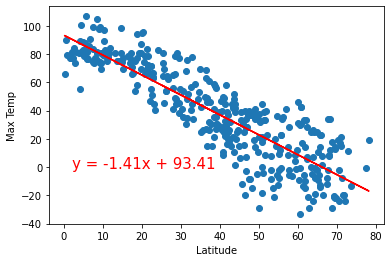

In [68]:
# Plot the linear regression, save the .png and display the figure
north_hem_df.plot.scatter(x='Lat', y='Max Temp')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
x_values = north_hem_df['Lat']
y_values = north_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-1),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/North_Hem_Temp_vs_Lat.png")
plt.show()

#### Southern Hemisphere - Temperature (F) vs. Latitude

The r-value is: 0.32253658721517714


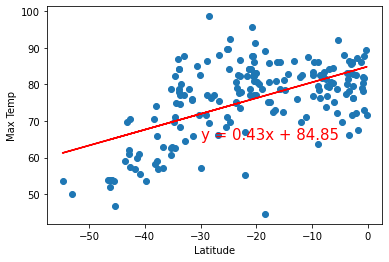

In [69]:
# Plot the linear regression, save the .png and display the figure
south_hem_df.plot.scatter(x='Lat', y='Max Temp')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
x_values = south_hem_df['Lat']
y_values = south_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,65),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/South_Hem_Temp_vs_Lat.png")
plt.show()

- The relationship between temperature and latitude is inverse in nothern and southern hemisphere. In the southern hemisphere, as the latitude increases, the temperature increases. In the northern hemisphere as the latitude increases the temperature decreases.

#### Northern Hemisphere - Humidity (%) vs. Latitude

The r-value is: 0.14546911585183928


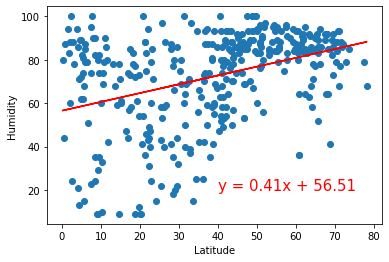

In [70]:
# Plot the linear regression, save the .png and display the figure
north_hem_df.plot.scatter(x='Lat', y='Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
x_values = north_hem_df['Lat']
y_values = north_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/North_Hem_Hum_vs_Lat.png")
plt.show()

#### Southern Hemisphere - Humidity (%) vs. Latitude

The r-value is: 0.026437627562182275


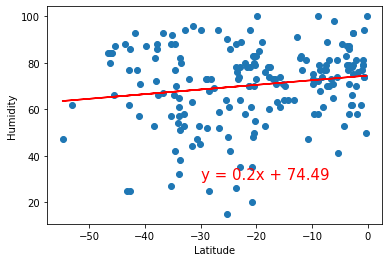

In [71]:
# Plot the linear regression, save the .png and display the figure
south_hem_df.plot.scatter(x='Lat', y='Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
x_values = south_hem_df['Lat']
y_values = south_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/South_Hem_Hum_vs_Lat.png")
plt.show()

- There is a very slight relationship between humidity and latitude in both the northern and southern hemishere.

#### Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-value is: 0.052560978483343956


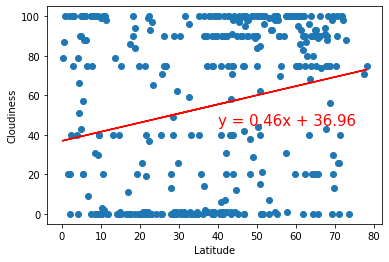

In [72]:
# Plot the linear regression, save the .png and display the figure
north_hem_df.plot.scatter(x='Lat', y='Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
x_values = north_hem_df['Lat']
y_values = north_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/North_Hem_Cloud_vs_Lat.png")
plt.show()

#### Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-value is: 0.16275175066520556


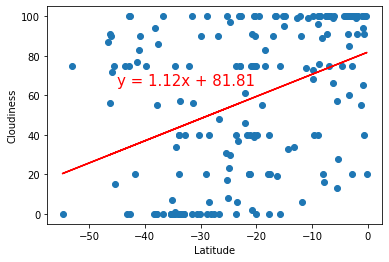

In [73]:
# Plot the linear regression, save the .png and display the figure
south_hem_df.plot.scatter(x='Lat', y='Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
x_values = south_hem_df['Lat']
y_values = south_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,65),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/South_Hem_Cloud_vs_Lat.png")
plt.show()

- Although there is no corelation between cloudiness and latitude, the linear regression shows an inverse relationship in both southern and northern hemisphere.

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-value is: 0.00041907372455000154


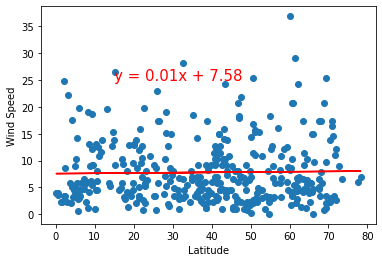

In [74]:
# Plot the linear regression, save the .png and display the figure
north_hem_df.plot.scatter(x='Lat', y='Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
x_values = north_hem_df['Lat']
y_values = north_hem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,25),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/North_Hem_Wind_vs_Lat.png")
plt.show()

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-value is: 0.012313827955877937


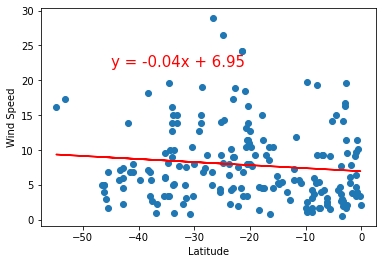

In [75]:
# Plot the linear regression, save the .png and display the figure
south_hem_df.plot.scatter(x='Lat', y='Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
x_values = south_hem_df['Lat']
y_values = south_hem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,22),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/South_Hem_Wind_vs_Lat.png")
plt.show()

- There is a very slight relationship between wind speed and latitude in both the northern and southern hemishere